# 8 Steps Of Machine Learning
1. Data Gathering
2. Data pre-processing
3. EDA
4. Feature Engineering
5. Feature Selection
6. Modeling
7. Test / Parameter Tuning
8. Deploy

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# Data Gathering

In [73]:
data = pd.read_csv(r'data\Iris.csv', index_col='Id')
data.columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Species']
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


# Data PreProcesssing

In [74]:
# removing "Iris-"
data['Species'] = data['Species'].apply(lambda s: s[5:])
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [75]:
# Check for Missing Values and Wrong data type
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


# EDA 

In [76]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLength,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidth,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLength,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidth,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [77]:
pd.pivot_table(data, values=['SepalLength', 'SepalWidth',
                             'PetalLength', 'PetalWidth'], index='Species')


,PetalLength,PetalWidth,SepalLength,SepalWidth
Species,,,,
setosa,1.464,0.244,5.006,3.418
versicolor,4.260,1.326,5.936,2.770
virginica,5.552,2.026,6.588,2.974


In [ ]:
sns.set(style='darkgrid')

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='PetalLength', y='PetalWidth', hue='Species')
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='SepalLength', y='SepalWidth', hue='Species')
plt.show()

In [ ]:
sns.pairplot(data, hue='Species')
plt.show()

In [ ]:
data.head()

# Feature Engineering 
* Feature Transformation
* Feature Encoding
* Feature Scaling

In [78]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data.Species = encoder.fit_transform(data.Species)
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [79]:
# Sepearate Features and target
features = data.drop(columns=['Species'])
target = data[['Species']]

# Feature Scaling

In [87]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features = pd.DataFrame(scaled_features)
scaled_features.columns = features.columns
features = scaled_features

In [88]:
# Split data into train and test set
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Feature Selection

In [89]:
from sklearn.feature_selection import mutual_info_classif
selector = mutual_info_classif(xtrain, ytrain.values.ravel(), random_state=42)
selector = pd.DataFrame(selector)
selector.columns = ['Score',]
selector.index = features.columns
selector = selector.sort_values(by='Score', ascending=False)
selector

,Score
PetalLength,0.982332
PetalWidth,0.963223
SepalLength,0.464479
SepalWidth,0.165316


<AxesSubplot:>

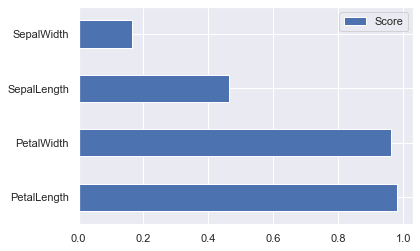

In [91]:
selector.plot.barh()

In [92]:
from sklearn.feature_selection import SelectKBest
extractor = SelectKBest(mutual_info_classif, k=2)
extractor.fit(xtrain, ytrain.values.ravel())
best_features = extractor.get_feature_names_out()

In [93]:
x = xtrain[best_features]
y = ytrain.values.ravel()

In [94]:
xt = xtest[best_features]
ytrue = ytest.values.ravel()

# Modeling

In [95]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x, y)

LogisticRegression()

In [96]:
ypred = model.predict(xt)
ypred == ytrue

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [97]:
encoder.inverse_transform(ypred)

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [98]:
# Test and Eavluate
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, plot_confusion_matrix
confusion_matrix(ytrue, ypred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [99]:
accuracy_score(ytrue, ypred)

1.0

In [100]:
f1_score(ytrue, ypred, average='weighted')

1.0

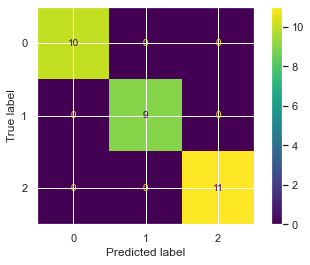

In [101]:
plot_confusion_matrix(model, xt, ytrue)

# Test/Tune Model - Cross Validation

In [102]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(model, features[best_features], target.values.ravel())
cv

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [103]:
cv.mean()

0.96

# Test/Tune Model -Parameter Tuning

In [104]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [105]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
    model,
    param_grid={
       'C': [1,2,3,4,5,6,7,8,9],
       'penalty': ['l1','l2'],
       'solver': ['lbfgs', 'sag', 'liblinear','newton-cg' ],
       'max_iter': [5000,]
    }, scoring='accuracy'
)
grid.fit(xtrain[best_features], ytrain.values.ravel())

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'max_iter': [5000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'sag', 'liblinear', 'newton-cg']},
             scoring='accuracy')

In [106]:
grid.best_params_

{'C': 9, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'liblinear'}

In [107]:
best_model = grid.best_estimator_

# Model Visualzation

In [108]:
import warnings
warnings.filterwarnings(action='ignore')

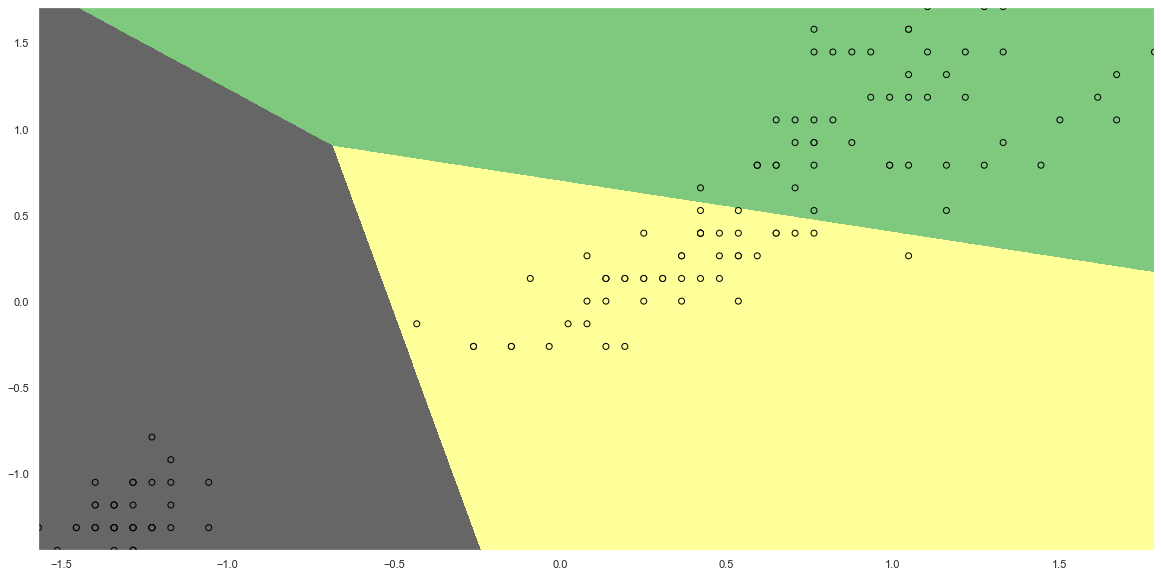

In [109]:
xmin, xmax = features.PetalLength.values.min(), features.PetalLength.values.max()
ymin, ymax = features.PetalWidth.values.min(), features.PetalWidth.values.max()

xx, yy = np.meshgrid(
    np.arange(xmin, xmax, 0.001), np.arange(ymin, ymax, 0.001)
)

grid = np.c_[xx.ravel(), yy.ravel()]
y_pred = best_model.predict(grid)
y_pred = y_pred.reshape(yy.shape)

predictions = best_model.predict(features[best_features])

plt.figure(1, figsize=(20, 10))
plt.set_cmap(plt.cm.Accent_r)
plt.pcolormesh(xx, yy, y_pred)
plt.scatter(features.PetalLength, features.PetalWidth, c=predictions, edgecolors='black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

# Pipelines

In [112]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(C=9, max_iter=5000,penalty='l2', solver='liblinear'))
    ]
)
pipeline.fit(xtrain[best_features], ytrain)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=9, max_iter=5000, solver='liblinear'))])

In [114]:
y_pred = pipeline.predict(xtest[best_features])
accuracy_score(y_pred, ytrue)

1.0

In [115]:
pipeline.fit(features[best_features], target)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=9, max_iter=5000, solver='liblinear'))])

# Saving Models

In [116]:
from joblib import dump
dump(pipeline, 'ClassifierPipeline')

['ClassifierPipeline']

# Loading Saved Models

In [117]:
from joblib import load
pipe = load('ClassifierPipeline')

In [118]:
pipe.predict(xtest[best_features])

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [119]:
pipe.predict(np.array([
    [0.2, 2],
    [0.3, 2.3]
]))

array([2, 2])